<a href="https://colab.research.google.com/github/junyeog/deep-learning-project/blob/main/voice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df_voice=pd.read_csv("/content/drive/MyDrive/project/voice.csv")


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/project/voice.csv")

In [ ]:
print(f"데이터셋 형태: {df_voice.shape}")
print("\n데이터셋 상위 5행:")
print(df_voice.head())
print("\n데이터셋 정보:")
df_voice.info()
print("\n결측치 확인:")
print(df_voice.isnull().sum()) # 결측치 확인

데이터셋 형태: (3168, 21)

데이터셋 상위 5행:
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  


In [ ]:
le = LabelEncoder()
df_voice['label_encoded'] = le.fit_transform(df_voice['label'])
print(f"\n인코딩된 성별 매핑: {le.classes_} -> {le.transform(le.classes_)}")
print(f"인코딩 후 'label' 컬럼 분포:\n{df_voice['label'].value_counts(normalize=True)}")


인코딩된 성별 매핑: ['female' 'male'] -> [0 1]
인코딩 후 'label' 컬럼 분포:
label
male      0.5
female    0.5
Name: proportion, dtype: float64



스케일링 후 특징 매트릭스 X_scaled_df 형태: (3168, 20)
훈련 세트 크기: (2534, 20)
테스트 세트 크기: (634, 20)

--- 여러 모델 훈련 및 평가 시작 ---

모델: Logistic Regression 훈련 중...
  정확도 (Accuracy): 0.9637
  정밀도 (Precision): 0.9509
  재현율 (Recall): 0.9779
  F1-Score: 0.9642
  ROC-AUC Score: 0.9965

모델: Decision Tree 훈련 중...
  정확도 (Accuracy): 0.9716
  정밀도 (Precision): 0.9746
  재현율 (Recall): 0.9685
  F1-Score: 0.9715
  ROC-AUC Score: 0.9716

모델: Random Forest 훈련 중...
  정확도 (Accuracy): 0.9842
  정밀도 (Precision): 0.9812
  재현율 (Recall): 0.9874
  F1-Score: 0.9843
  ROC-AUC Score: 0.9989

모델: SVM (Linear Kernel) 훈련 중...
  정확도 (Accuracy): 0.9716
  정밀도 (Precision): 0.9628
  재현율 (Recall): 0.9811
  F1-Score: 0.9719
  ROC-AUC Score: 0.9973

모델: K-Nearest Neighbors 훈련 중...
  정확도 (Accuracy): 0.9795
  정밀도 (Precision): 0.9720
  재현율 (Recall): 0.9874
  F1-Score: 0.9797
  ROC-AUC Score: 0.9990

모델: Gaussian Naive Bayes 훈련 중...
  정확도 (Accuracy): 0.9117
  정밀도 (Precision): 0.8991
  재현율 (Recall): 0.9274
  F1-Score: 0.9130
  ROC-AUC Score: 0.9544


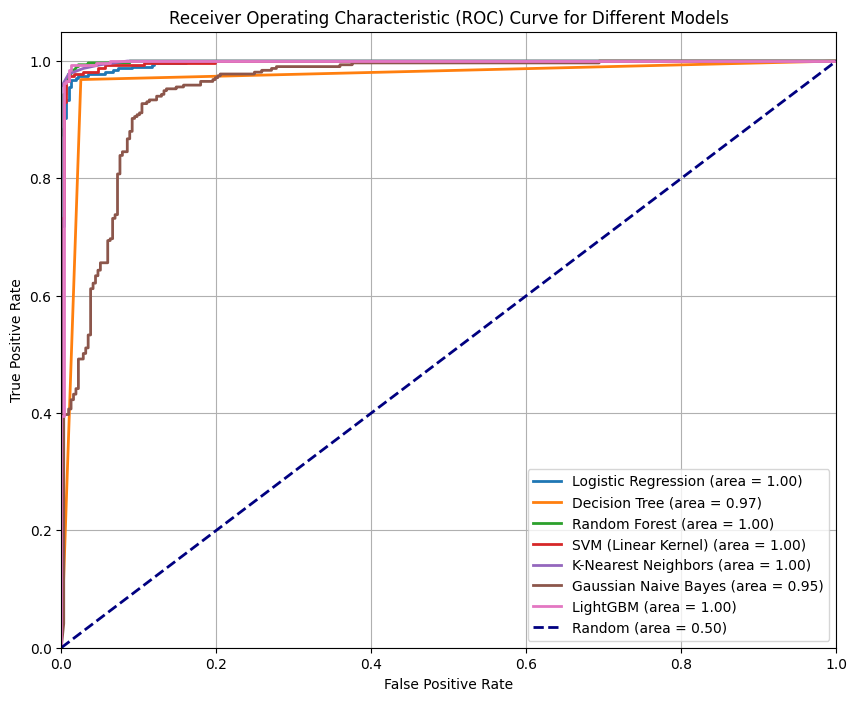

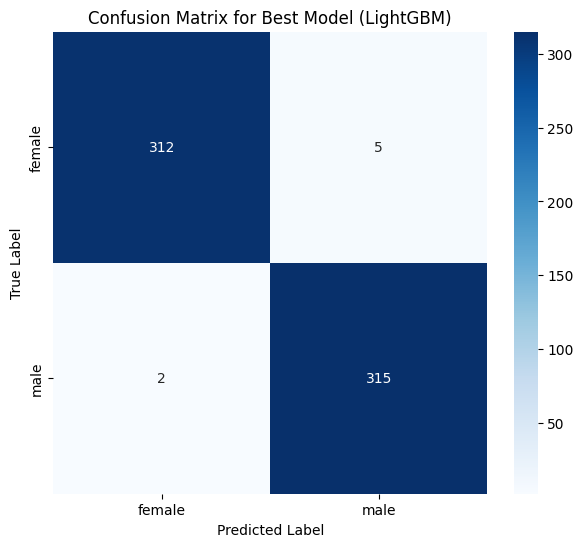

In [ ]:
# 3. 특징(X)과 타겟(y) 분리
# 'label' 컬럼과 'label_encoded' 컬럼을 제외한 모든 컬럼을 특징으로 사용
X = df_voice.drop(['label', 'label_encoded'], axis=1)
y = df_voice['label_encoded']

# 4. 특징 스케일링
# 모든 특징이 수치형이므로 MinMaxScaler 적용
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(f"\n스케일링 후 특징 매트릭스 X_scaled_df 형태: {X_scaled_df.shape}")

# 5. 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

print(f"훈련 세트 크기: {X_train.shape}")
print(f"테스트 세트 크기: {X_test.shape}")

# --- 여러 모델 훈련 및 평가 (이전 코드와 유사) ---
# 이제 X_train, X_test가 TF-IDF 대신 음성 특징 데이터가 됩니다.

models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM (Linear Kernel)': SVC(kernel='linear', probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
}

if lgb:
    models['LightGBM'] = lgb.LGBMClassifier(random_state=42)
else:

    models['Gradient Boosting'] = GradientBoostingClassifier(random_state=42)


results = []
roc_curves = {} #

print("\n--- 여러 모델 훈련 및 평가 시작 ---")
for name, model in models.items():
    print(f"\n모델: {name} 훈련 중...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_curves[name] = (fpr, tpr)
    except AttributeError:
        y_prob = None
        roc_auc = np.nan
        print(f"경고: {name}은 predict_proba를 지원하지 않아 ROC-AUC를 계산할 수 없습니다.")

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

    print(f"  정확도 (Accuracy): {accuracy:.4f}")
    print(f"  정밀도 (Precision): {precision:.4f}")
    print(f"  재현율 (Recall): {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    if not np.isnan(roc_auc):
        print(f"  ROC-AUC Score: {roc_auc:.4f}")
    else:
        print(f"  ROC-AUC Score: N/A")

print("\n--- 모든 모델 평가 완료 ---")

results_df = pd.DataFrame(results).set_index('Model').sort_values(by='F1-Score', ascending=False)
print("\n--- 모델별 성능 요약 ---")
print(results_df.round(4))



plt.figure(figsize=(10, 8))
for name, (fpr, tpr) in roc_curves.items():
    if name in results_df.index and not np.isnan(results_df.loc[name, "ROC-AUC"]):
        plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {results_df.loc[name, "ROC-AUC"]:.2f})')
    elif name in results_df.index:
        plt.plot(fpr, tpr, lw=2, label=f'{name}')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (area = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Different Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 최적 모델 혼동 행렬
best_model_name = results_df.index[0]
if best_model_name in models:
    best_model = models[best_model_name]
else:

    if best_model_name == 'Logistic Regression': #
        best_model = models['Logistic Regression']
    else:
        best_model = models[best_model_name]


y_pred_best = best_model.predict(X_test)
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(7, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Confusion Matrix for Best Model ({best_model_name})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,593 (182.00 KB)

 Trainable params: 46,593 (182.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
57/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6561 - loss: 0.8783
Epoch 1: val_accuracy improved from -inf to 0.96842, saving model to best_voice_gender_mlp_model.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6810 - loss: 0.8481 - val_accuracy: 0.9684 - val_loss: 0.3829 - learning_rate: 0.0010
Epoch 2/100
53/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9342 - loss: 0.4530
Epoch 2: val_accuracy improved from 0.96842 to 0.98526, saving model to best_voice_gender_mlp_model.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9373 - loss: 0.4441 - val_accuracy: 0.9853 - val_loss: 0.3001 - learning_rate: 0.0010
Epoch 3/100
69/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9691 - loss: 0.3243
Epoch 3: val_accuracy did not improve from 0.98526
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9691 - loss: 0.3245 - val_accuracy: 0.9768 - val_loss: 0.2849 - learning_rate: 0.0010
Epoch 4/100
68/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.961

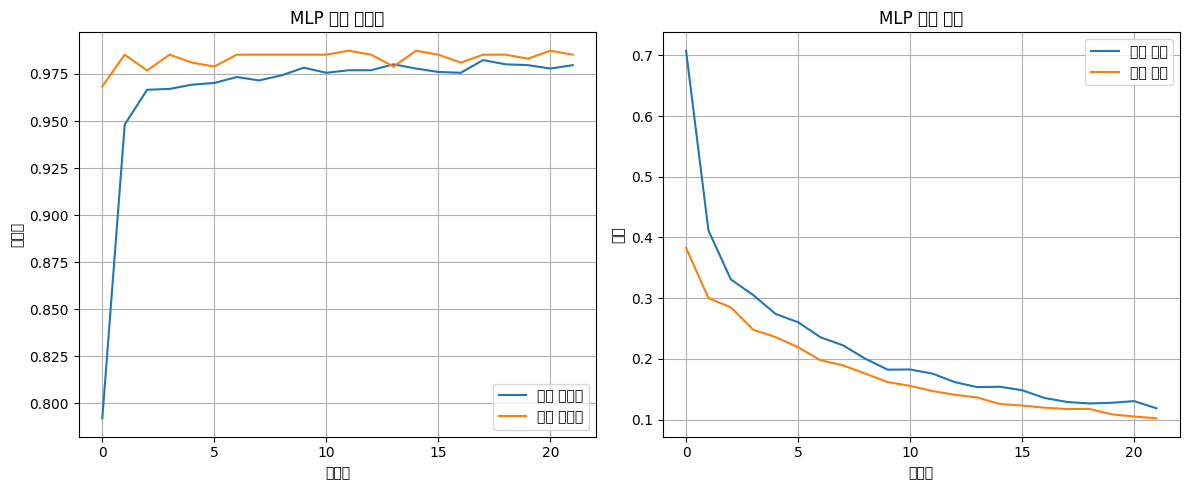

In [ ]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label']) # 'male' -> 0, 'female' -> 1 또는 그 반대

# 특징(X)과 타겟(y) 분리
X = df.drop('label', axis=1)
y = df['label']

# 데이터 분할 (훈련, 검증, 테스트)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp) # 15% 검증, 15% 테스트

# 특징 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 딥러닝 모델의 입력 차원
input_dim = X_train_scaled.shape[1]

# 3. 딥러닝 모델 구축 (MLP)
model = Sequential([
    Dense(256, activation='relu', input_shape=(input_dim,),
          kernel_regularizer=regularizers.l2(0.001)), # L2 정규화
    Dropout(0.5), # Dropout

    Dense(128, activation='relu',
          kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),

    Dense(64, activation='relu',
          kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),

    Dense(1, activation='sigmoid') # 이진 분류
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# 5. 콜백 설정
checkpoint_filepath = 'best_voice_gender_mlp_model.keras'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10, # 검증 정확도가 10 에포크 동안 개선되지 않으면 중단
    mode='max',
    restore_best_weights=True,
    verbose=1
)

reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5, # 검증 손실이 5 에포크 동안 개선되지 않으면 학습률 절반으로 감소
    min_lr=0.000001,
    verbose=1
)

callbacks_list = [model_checkpoint_callback, early_stopping_callback, reduce_lr_callback]

# 6. 모델 학습
history = model.fit(
    X_train_scaled, y_train,
    epochs=100, # 충분히 큰 에포크 수 (EarlyStopping이 알아서 중단)
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    callbacks=callbacks_list,
    verbose=1
)

# 7. 모델 평가
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\n테스트 손실: {test_loss:.4f}")
print(f"테스트 정확도: {test_accuracy:.4f}")

# 8. 학습 과정 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='훈련 정확도')
plt.plot(history.history['val_accuracy'], label='검증 정확도')
plt.title('MLP 모델 정확도')
plt.xlabel('에포크')
plt.ylabel('정확도')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='훈련 손실')
plt.plot(history.history['val_loss'], label='검증 손실')
plt.title('MLP 모델 손실')
plt.xlabel('에포크')
plt.ylabel('손실')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()